In [1]:
import os
import imageio.v2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow import keras
from scipy import misc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam


In [2]:
train_path = 'Training'
test_path = 'Testing'


data1 = []
y1 = []


for r, d, f in os.walk(train_path):
    for file in f:
        if '.jpg' in file:
          
            path = os.path.join(r, file)
            
            if 'glioma_tumor' in r:
                y1.append(3)
            elif 'meningioma_tumor' in r:
                y1.append(2)
            elif 'pituitary_tumor' in r:
                y1.append(1)
            elif 'no_tumor' in r:
                y1.append(0)
            
            img = Image.open(path)
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data1.append(np.array(img))


for r, d, f in os.walk(test_path):
    for file in f:
        if '.jpg' in file:
            
            path = os.path.join(r, file)
            
            if 'glioma_tumor' in r:
                y1.append(3)
            elif 'meningioma_tumor' in r:
                y1.append(2)
            elif 'pituitary_tumor' in r:
                y1.append(1)
            elif 'no_tumor' in r:
                y1.append(0)
            
            img = Image.open(path)
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data1.append(np.array(img))


In [3]:
data1 = np.array(data1)
y1 = np.array(y1)
y1 = np_utils.to_categorical(y1)
print(data1.shape)
print(y1.shape)


(3264, 128, 128, 3)
(3264, 4)


In [4]:
data1= data1.astype('float32')
data1/=255


AxesImage(80,52.8;496x369.6)


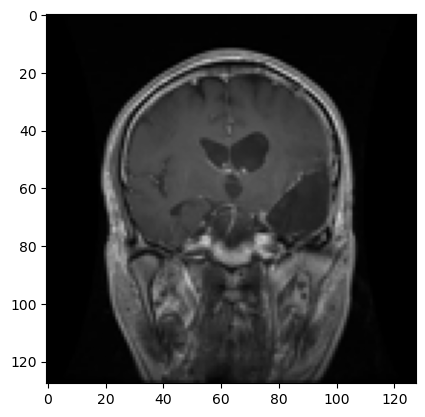

In [5]:
print(plt.imshow(data1[243]))

In [6]:
train_x, test_x,train_y, test_y = train_test_split(data1, y1, test_size= 0.2 , shuffle = True, random_state = 42)

In [7]:
model1 = Sequential()

model1.add(Conv2D(32, (2, 2), padding='same', input_shape=(128,128,3)))
model1.add(Activation('relu'))


model1.add(Conv2D(32, (2, 2)))
model1.add(Activation('relu'))


model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Dropout(0.2))


model1.add(Conv2D(128, (2, 2), padding='same'))
model1.add(Activation('relu'))


model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))


model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Dropout(0.25))


model1.add(Flatten())


model1.add(Dense(128))
model1.add(Activation('relu'))


model1.add(Dropout(0.5))


model1.add(Dense(64))
model1.add(Activation('relu'))


model1.add(Dense(4, Activation('softmax')))


In [8]:
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 127, 127, 32)      4128      
                                                                 
 activation_1 (Activation)   (None, 127, 127, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                        

In [9]:
opt1 = Adam(learning_rate=0.0001) 
model1.compile(loss='categorical_crossentropy', optimizer=opt1, metrics=['accuracy'])


history1 = model1.fit(train_x, train_y, batch_size=50, epochs=15, validation_data=(test_x, test_y), verbose=1)


Epoch 1/15
53/53 [==============================] - 106s 2s/step - loss: 1.2971 - accuracy: 0.4037 - val_loss: 1.2113 - val_accuracy: 0.4885
Epoch 2/15
53/53 [==============================] - 111s 2s/step - loss: 1.1613 - accuracy: 0.4864 - val_loss: 1.0527 - val_accuracy: 0.5299
Epoch 3/15
53/53 [==============================] - 105s 2s/step - loss: 1.0192 - accuracy: 0.5481 - val_loss: 0.9544 - val_accuracy: 0.6034
Epoch 4/15
53/53 [==============================] - 108s 2s/step - loss: 0.9103 - accuracy: 0.6009 - val_loss: 0.8283 - val_accuracy: 0.6508
Epoch 5/15
53/53 [==============================] - 119s 2s/step - loss: 0.8016 - accuracy: 0.6664 - val_loss: 0.7911 - val_accuracy: 0.6861
Epoch 6/15
53/53 [==============================] - 129s 2s/step - loss: 0.7259 - accuracy: 0.6944 - val_loss: 0.7588 - val_accuracy: 0.6937
Epoch 7/15
53/53 [==============================] - 111s 2s/step - loss: 0.6743 - accuracy: 0.7166 - val_loss: 0.7222 - val_accuracy: 0.6937
Epoch 8/15
53

In [10]:
loss1, accuracy1 = model1.evaluate(test_x, test_y)
print('Testing loss:', loss1)
print('Testing accuracy:', accuracy1)


21/21 [==============================] - 7s 314ms/step - loss: 0.5139 - accuracy: 0.7994
Testing loss: 0.5139402151107788
Testing accuracy: 0.7993874549865723


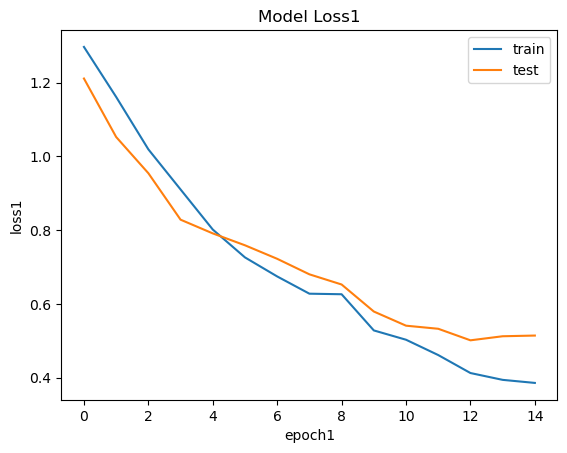

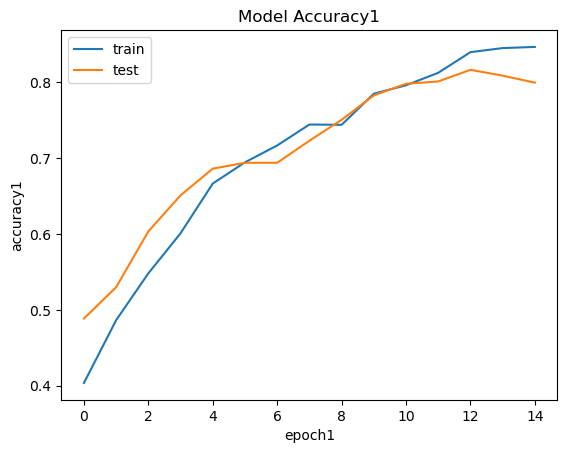

In [11]:
import matplotlib.pyplot as plt


plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='test')
plt.title('Model Loss1')
plt.ylabel('loss1')
plt.xlabel('epoch1')
plt.legend()
plt.show()


plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.title('Model Accuracy1')
plt.ylabel('accuracy1')
plt.xlabel('epoch1')
plt.legend()
plt.show()

